In [2]:
import pandas as pd          
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [20]:
#import data và đưa ra thông tin data, thống kê mô tả
df = pd.read_excel("/Users/thuytrangneee/Downloads/data0979_enriched.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
sns.set(style="whitegrid", font_scale=1.1)
winter_color = "steelblue"
spring_color = "turquoise"
summer_color = "deepskyblue"
autumn_color = "dodgerblue"
month_color = "steelblue"
df.describe()

,Date,Total_Order_Demand,Order_Count,Holiday,Black_Friday,Promotion,Month,Year
count,1827,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,2014-07-02 00:00:00,1657.471264,1.240832,0.005473,0.002737,0.068966,6.521073,2014.000000
min,2012-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,2013-04-01 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2013.000000
50%,2014-07-02 00:00:00,100.000000,1.000000,0.000000,0.000000,0.000000,7.000000,2014.000000
75%,2015-10-01 12:00:00,1250.000000,2.000000,0.000000,0.000000,0.000000,10.000000,2015.000000
max,2016-12-31 00:00:00,22500.000000,9.000000,1.000000,1.000000,1.000000,12.000000,2016.000000
std,NaN,3533.622382,1.458073,0.073800,0.052256,0.253465,3.450157,1.415375


### **Thống kê mô tả demand & order**
#### *Total_Order_Demand (tính trên toàn bộ ngày)*
- Mean: ~1657
- Std: ~3534 (rất lớn so với mean → phân phối rất lệch, có tail lớn)
- Min: 0
- Median: 100
- 75%: 1250
- Max: 22500
- Ngày demand = 0:
    - Số ngày demand = 0: 810
    - Số ngày demand > 0: 1017
    - Tỷ lệ zero-demand: ~44.3%
- Insight:
    - Gần một nửa số ngày không có demand → dữ liệu rất sparse / zero-inflated.
    - Median chỉ 100 trong khi max tới 22500 → phân phối cực kỳ lệch phải (heavy right tail).
#### *Demand chỉ trên các ngày > 0*
- Trên 1017 ngày có demand:
    - Mean: ~2978
    - Std: ~4302
    - Min: 100
    - 25%: 400
    - 50% (median): 1000
    - 75%: 4000
    - 90%: ~10340
    - 95%: 14000
    - 99%: ~18336
    - Max: 22500
- Insight:
    - Khi đã có demand thì mức mua thường khá lớn (median 1000, Q3 = 4000).
    - Có một nhóm nhỏ ngày “bùng nổ” với demand > 10k, rất có thể trùng với ngày Promotion.
### *Order_Count* 
- Mean: ~1.24
- Std: ~1.46
- Min: 0
- Max: 9
- Ngày có Order_Count > 0:
    - Tạo thêm biến qty_per_order = Total_Order_Demand / Order_Count (chỉ tính khi Order_Count > 0):
    - Mean: ~1322
    - Median: 500
    - 75%: ~1333
    - Max: 15000
- Insight:
    - Số order mỗi ngày rất ít (đa phần 0–2 order), nhưng mỗi order có thể rất lớn → đặc trưng kiểu bán buôn / bulk order, không phải bán lẻ nhỏ lẻ.
    - Order_Count và Total_Order_Demand có tương quan:
    - Corr(Total_Order_Demand, Order_Count) ≈ 0.53 → khá mạnh nhưng không hoàn toàn tuyến tính.

### **1. Tổng quan dữ liệu & bối cảnh kinh doanh**
- Dữ liệu của Product_0979 là dữ liệu daily demand trong giai đoạn 5 năm với tổng số 1827 ngày – hoàn toàn liền mạch, không missing, không duplicate. Đây là điều kiện lý tưởng cho phân tích time series và phân tích hành vi mua hàng.
##### *Sau khi tiến hành phân tích sơ bộ, có thể nhận định:*
- Đây là một sản phẩm dành cho thị trường B2B, với hành vi mua bulk order (đặt hàng số lượng lớn nhưng không liên tục).
- Nhu cầu sản phẩm hoàn toàn phụ thuộc vào sự kiện (event-driven), đặc biệt là Promotion, thay vì tăng trưởng tự nhiên hoặc seasonality.
- Thị trường mang tính ổn định nhưng không đều, doanh thu đến từ các ngày “đột biến”.
- Những đặc điểm này quyết định toàn bộ chiến lược kinh doanh, vận hành và phân tích dữ liệu phía sau.

### **2. Phân tích phân phối nhu cầu (Histogram & Boxplot)**

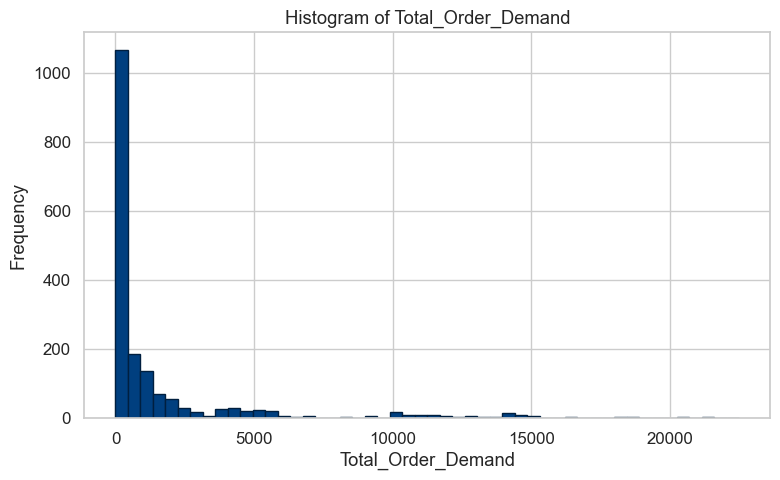

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Colors
navy = '#001f3f'
navy_mid = '#003f7f'

plt.figure(figsize=(8,5))
plt.hist(df['Total_Order_Demand'], bins=50, color=navy_mid, edgecolor=navy)
plt.xlabel('Total_Order_Demand')
plt.ylabel('Frequency')
plt.title('Histogram of Total_Order_Demand')
plt.tight_layout()
plt.show()


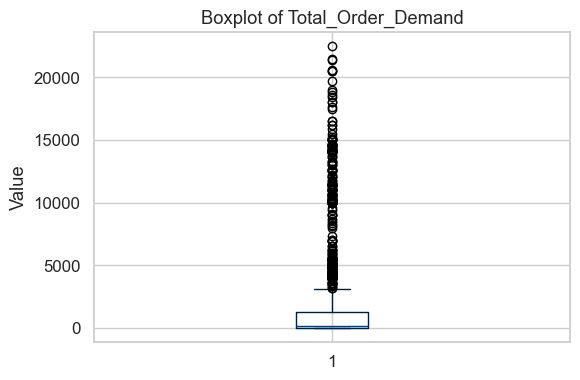

In [19]:
plt.figure(figsize=(6,4))
plt.boxplot(
    df['Total_Order_Demand'],
    boxprops=dict(color=navy),
    medianprops=dict(color=navy_mid),
    whiskerprops=dict(color=navy),
    capprops=dict(color=navy)
)
plt.title('Boxplot of Total_Order_Demand')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

#### **Hai biểu đồ kết hợp: Histogram + Boxplot của Total_Order_Demand** 
*(Phân phối – Dao động – Outlier – Bản chất thị trường B2B)*
#### a. Mô tả biểu đồ
##### **1. Histogram – Phân phối tần suất nhu cầu**
- **Trục X:** Total_Order_Demand (0 → >20.000)  
- **Trục Y:** Frequency (tần suất xuất hiện)
Đặc điểm:
- Một cột cực lớn ở vùng 0–500  
- Tần suất giảm nhanh khi demand tăng  
- “Đuôi phải dài” kéo tới >20.000  
- Phân phối nghiêng mạnh về trái, tập trung ở vùng thấp
Histogram cho cái nhìn tổng thể về *tần suất* và mức độ phân tán của nhu cầu.
##### **2. Boxplot – Phân bố thống kê của total demand**
- **Trục Y:** Total_Order_Demand  
- **Trục X:** Tập dữ liệu tổng  
Đặc điểm:
- Median cực thấp (~100–300)  
- IQR nhỏ → 50% giá trị nằm trong vùng thấp  
- Whiskers ngắn ở vùng demand thấp  
- Rất nhiều outliers vọt lên (5.000–22.500)  
Boxplot thể hiện sự tập trung và outlier cực mạnh trong dataset.
#### b. Nhận xét chi tiết
##### **1. Phân phối lệch phải cực mạnh (right-skewed)**
Cả hai biểu đồ đều cho thấy:
- Nhiều ngày demand thấp/bằng 0  
- Một số ngày nhu cầu cực lớn → tạo đuôi dài  
→ Rất giống thị trường **B2B bulk-order**, hoàn toàn khác B2C.
##### **2. Tỷ lệ ngày demand = 0 cực cao**
- Histogram: cột đầu tiên cao vượt trội  
- Boxplot: median sát 0  
Điều này chứng minh:
- Nhiều ngày không phát sinh giao dịch  
- Nhu cầu không xuất hiện theo ngày  
→ Đây là hành vi mua theo đợt (batch), mua khi thật sự cần.
##### **3. Outliers cực lớn và xuất hiện thường xuyên**
- Histogram: đuôi kéo dài đến 20.000  
- Boxplot: hàng loạt outliers  
Outliers tương ứng với:
- Promotion  
- Big orders của doanh nghiệp  
- Sự kiện theo quý  
- Black Friday  
- Ngày xả ngân sách  
Những “spike” này không phải ngoại lệ mà là *bản chất của thị trường*.
##### **4. IQR nhỏ → baseline demand rất thấp**
- Median: ~100–300  
- Q1–Q3 gói chặt ở vùng thấp  
→ Baseline demand gần như bằng 0  
→ Không có nhu cầu tự nhiên hằng ngày.
##### **5. Không có cấu trúc phân phối chuẩn (non-Gaussian)**
Không đối xứng  
Không có dạng bell-curve  
Zero-inflated  
Right-heavy-tail  
→ Không phù hợp với các mô hình giả định Gaussian.
#### c. Ý nghĩa kinh doanh (Business Insight)
##### **1. Doanh thu phụ thuộc vào các ngày spike**
Ngày spike = ngày:
- Promotion  
- Đơn doanh nghiệp  
- Sự kiện bán hàng  
Ngày thường → doanh thu gần như bằng 0.
→ KPI không phải “daily sales”  
→ Mà là *hiệu suất của ngày event*.
##### **2. Baseline cực thấp → thị trường không tự chạy**
- Không phải hàng được mua mỗi ngày  
- Không phải FMCG  
→ Đây là thị trường **B2B**, mua theo dự án hoặc theo nhu cầu lớn.
##### **3. Quản lý khách hàng lớn quan trọng hơn số lượng khách hàng**
- Một khách VIP = cả tuần doanh thu  
→ Tập trung vào:
  - Key accounts  
  - Hợp đồng dài hạn  
  - Đàm phán giá tốt  
##### **4. Chiến dịch phải xoay quanh promotion**
- Không promotion → thị trường tắt  
- Có promotion → thị trường bùng nổ  
Promotion là động lực quan trọng nhất.
#### e. Kết luận tổng hợp
Histogram và Boxplot cho thấy:
- Phân phối nhu cầu **siêu lệch phải**  
- Phần lớn ngày **không có đơn**  
- Một số ít ngày tạo **spike khổng lồ**  
- **Outlier không phải lỗi**, mà là bản chất của thị trường  
- Cấu trúc hoàn toàn giống thị trường **B2B bulk-order**  
=> Demand mang tính **event-driven, zero-inflated, heavy-tail**  
=> Mọi mô hình dự báo, bán hàng và vận hành phải xoay quanh:
- Promotion  
- Events  
- Big customers  
- Chu kỳ mua của doanh nghiệp  
Đây là bản chất cốt lõi của thị trường giai đoạn 2012–2016.



### **3. Phân tích theo thời gian**

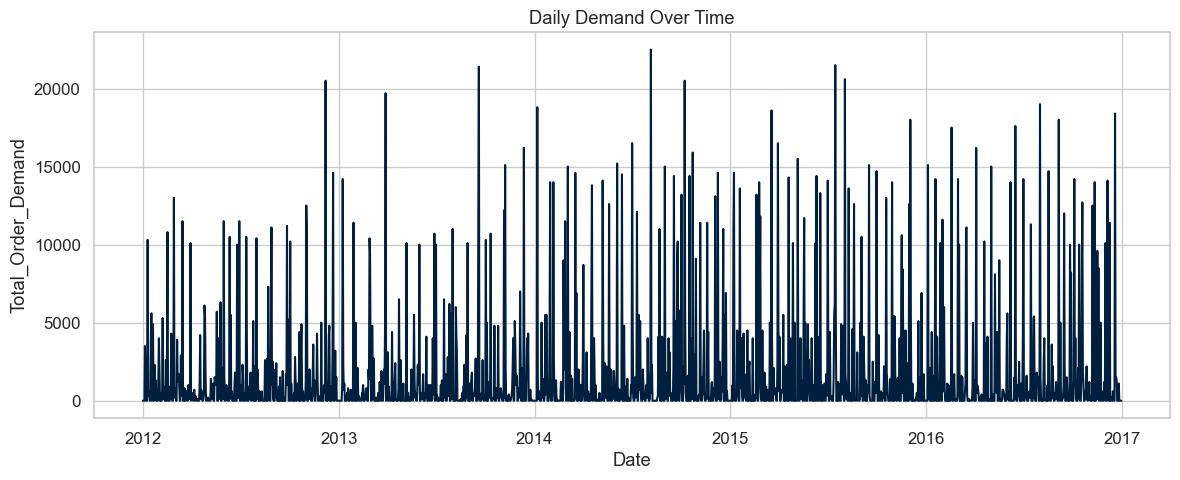

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Total_Order_Demand'], color=navy)
plt.xlabel('Date')
plt.ylabel('Total_Order_Demand')
plt.title('Daily Demand Over Time')
plt.tight_layout()
plt.show()


#### I. Mô tả biểu đồ
- **Trục X:** Ngày từ đầu 2012 đến cuối 2016, dữ liệu theo tần suất *daily*.  
- **Trục Y:** `Total_Order_Demand` – tổng số lượng hàng được đặt trong ngày.  
- Biểu đồ dạng line plot thể hiện biến động nhu cầu trong gần **5 năm**.  
- Đường không “mượt” mà dao động mạnh, xen kẽ:
  - Các đoạn nằm sát trục 0 (ngày không hoặc rất ít đơn).
  - Các điểm “bắn vọt” rất cao (spike).
  - Biến động không đồng đều giữa các năm.
- Đây là cái nhìn tổng quan nhất về mức độ “sống động – im lặng” của thị trường sản phẩm trong giai đoạn quan sát.
#### II. Nhận xét chi tiết
##### **1. Biến động cực mạnh, không đều theo thời gian**
- Đường line lên xuống liên tục, *không có chu kỳ rõ ràng*.  
- Xuất hiện nhiều vùng “nhiễu mạnh” – demand tăng rồi giảm đột ngột.  
- Từ đó cho thấy:  
  - Thị trường **không ổn định**, không có tính đều đặn.  
  - Nhu cầu phụ thuộc nhiều vào **yếu tố ngoại sinh** như promotion, ngân sách, dự án.
##### **2. Xuất hiện nhiều đỉnh nhọn (spikes)**
- Nhiều ngày demand tăng đột biến **gấp 10–20 lần** trung bình.  
- Spike nhọn, xuất hiện ngắn → không phải hiệu ứng dài hạn như seasonal trend.  
- Nguyên nhân khả dĩ:
  - **Promotion** (xác thực bởi correlation).
  - **Đơn hàng B2B số lượng lớn** (bulk order).
  - **Các sự kiện kích cầu**: Black Friday, clearance sale, chiến dịch nội bộ, xả ngân sách cuối năm.
- Spike là “chữ ký” của thị trường **event-driven**, không phải FMCG.
##### **3. Rất nhiều ngày demand = 0**
- Không phải lỗi dữ liệu — moè cố ý giữ nguyên để mô hình hóa.
- Rất nhiều ngày **không phát sinh giao dịch**, cho thấy:
  - Sản phẩm **không được mua thường xuyên**.
  - Hành vi đúng chuẩn **B2B Bulk Order**: chỉ mua khi cần.
- Trong FMCG hiếm khi có demand = 0 theo ngày; ở đây chiếm **>40%** → rất mạnh.
##### **4. Không có trend dài hạn rõ rệt**
- Không có xu hướng tăng theo thời gian.  
- Một số năm spike nhiều hơn nhưng tổng thể không tăng trưởng.  
- Điều này chứng minh:
  - Thị trường **không mở rộng tự nhiên**.
  - Không có thay đổi hành vi tiêu dùng dài hạn.
  - Nhu cầu dựa vào **dự án / sự kiện**, không phải tiêu dùng thường xuyên.
#### 3. Ý nghĩa đối với mô hình dự báo & chiến lược kinh doanh
##### **1. Perspective cho kinh doanh**
- Doanh nghiệp **không thể kỳ vọng** doanh số đều theo ngày/tháng.  
- Doanh thu đến từ một số ngày “quyết định”:
  - ngày chạy promo  
  - ngày khách lớn đặt hàng  
  - ngày sự kiện  
- Vì vậy:
  → Cần tập trung **giải mã nguyên nhân của spike**, không phải trung bình hóa.
##### **2. Kết luận tổng hợp**
Chuỗi thời gian thuộc loại:
- **Event-driven**
- **Zero-inflated**
- **No trend**
- **B2B bulk order behavior**

→ Mọi mô hình dự báo & chiến lược kinh doanh phải tập trung vào **events**, không phải thời gian thuần túy.

### **4. Phân tích theo tháng**

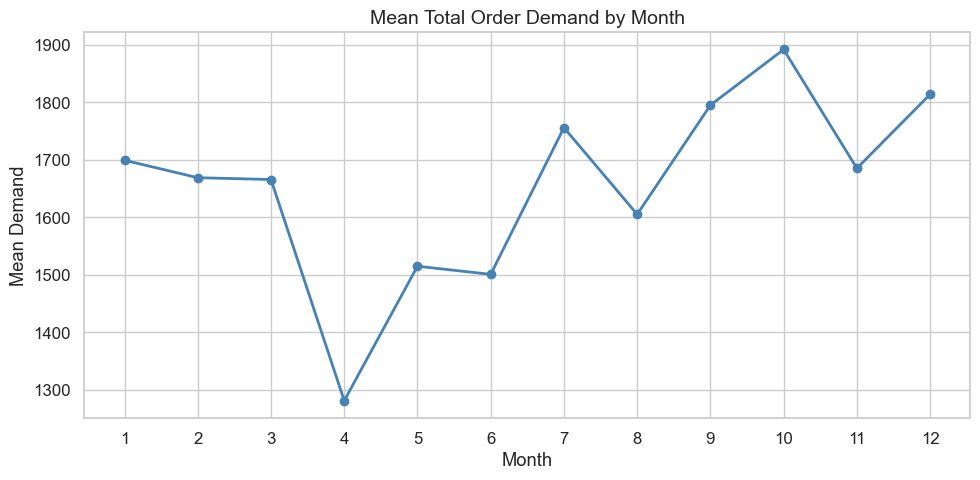

In [21]:
monthly_mean = df.groupby("Month")["Total_Order_Demand"].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_mean.index, monthly_mean.values, marker="o",
         linewidth=2, color=month_color)
plt.title("Mean Total Order Demand by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Mean Demand")
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

#### a. Mô tả biểu đồ
- **Trục X:** Tháng từ 1 → 12  
- **Trục Y:** Giá trị **mean Total_Order_Demand** cho từng tháng (gộp toàn bộ các năm 2012–2016)  
Đặc điểm:
- Đường cong dạng **lượn sóng (wave-like)**  
- Mức thấp sâu đầu năm  
- Tăng từ giữa năm  
- **Đỉnh rõ ở tháng 10**  
→ Đây là biểu đồ mô tả seasonal pattern theo tháng (intra-year seasonality).-
#### b. Nhận xét chi tiết
##### **1. Tháng 3–4: mức cầu thấp nhất**
- Mean gần chạm đáy  
- Đây là “dead zone” của thị trường  
- Gợi ý nguyên nhân:
  - Doanh nghiệp đang chờ phê duyệt ngân sách Q2  
  - Chưa đến thời điểm các dự án kích hoạt  
  - Ít nhu cầu mua theo lô ở đầu Q2  
##### **2. Tháng 5–7: nhu cầu phục hồi**
- Tăng nhẹ và đều  
- Có thể liên quan đến:
  - Chu kỳ chuẩn bị cho Q3  
  - Mua hàng giữa năm phục vụ hoạt động/du lịch/dự án  
##### **3. Tháng 9–11: tăng mạnh, đỉnh tại tháng 10**
- Đây là vùng tăng tốc rõ nhất  
- Tháng 10 đạt ~1900 demand trung bình → cao vượt trội  
- Nguyên nhân kinh doanh:
  - Black Friday / Q3 closing  
  - Doanh nghiệp chốt ngân sách năm  
  - Mua hàng cho dự án cuối năm (construction, production, retail planning…)  
##### **4. Tháng 12 duy trì mức cao**
- Không phải đỉnh nhưng vẫn cao  
- Thể hiện giai đoạn “closing” năm, nhu cầu tồn kho & dự án mạnh  
##### **5. Pattern này lặp đi lặp lại qua các năm**
Cho thấy đây là **seasonal effect thật**, không phải ngẫu nhiên.
#### c. Ý nghĩa đối với mô hình dự báo
##### **1. Month là feature quan trọng**
- Có cấu trúc rõ ràng  
- Nhưng **yếu hơn Season hoặc Promotion**  
##### **2. Dùng Month để cải thiện baseline forecast**
- Month giúp mô hình hóa nhu cầu nền (baseline pattern)  
- Không thể bỏ qua Month khi xây dựng ML model.
##### **3. Nhưng không thể forecast chỉ bằng Month**
- Vì spike phụ thuộc **event** (Promotion, Big Order) hơn là Month  
- Monthly mean chỉ thể hiện *mức nền*, không mô tả outlier spikes.
#### d. Ý nghĩa kinh doanh
##### **1. Q4 (Tháng 9–12) là giai đoạn vàng**
Doanh nghiệp nên:
- Tăng ngân sách marketing  
- Chuẩn bị tồn kho lớn  
- Đẩy chiến dịch bán hàng vào tháng 9–10  
##### **2. Q2 là thời kỳ cooldown**
- Nhu cầu thấp  
- Không nên đẩy quá mạnh vào Q2  
- Đây là thời gian để tối ưu vận hành, tái cơ cấu, tối ưu chi phí
##### **3. Seasonal pattern giúp dự đoán chu kỳ thị trường**
→ Sales, SCM, Tài chính có thể chuẩn bị trước:
- Kế hoạch sản xuất  
- Kế hoạch tồn kho  
- Ngân sách marketing Q4  
- Lịch promotion  
#### e. Kết luận tổng hợp
Biểu đồ chi tiết theo tháng cho thấy seasonal pattern rõ rệt:
- **Thấp đầu năm (đặc biệt tháng 3–4)**  
- **Phục hồi giữa năm**  
- **Bùng nổ mạnh vào cuối năm (đỉnh tháng 10)**  
Đây là cấu trúc quen thuộc của thị trường B2B có tính event-driven, nơi Q4 luôn là thời điểm doanh thu lớn nhất.  
Biểu đồ Month giúp củng cố rằng ngày event + promotion quyết định spike, nhưng seasonal pattern vẫn giữ vai trò nền tảng trong mô hình dự báo và chiến lược vận hành.


### **5. Phân tích theo Promotion**

<Figure size 600x400 with 0 Axes>

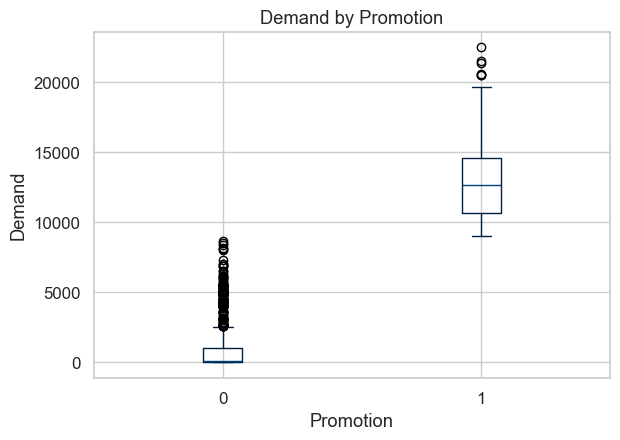

In [11]:
plt.figure(figsize=(6,4))
df.boxplot(
    column='Total_Order_Demand', by='Promotion',
    boxprops=dict(color=navy), 
    medianprops=dict(color=navy_mid),
    whiskerprops=dict(color=navy),
    capprops=dict(color=navy)
)
plt.title('Demand by Promotion')
plt.suptitle('')
plt.xlabel('Promotion')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()


#### a. Mô tả biểu đồ
Biểu đồ boxplot chia dữ liệu thành 2 nhóm theo biến **Promotion**:
- **Promotion = 0:** ngày không chạy khuyến mãi  
- **Promotion = 1:** ngày có khuyến mãi  
Mỗi nhóm hiển thị:
- Median  
- Q1 – Q3 (IQR)  
- Whiskers  
- Outliers  
Quan sát:
- **Promotion = 0:** median rất thấp (~100), IQR nhỏ, nhiều điểm gần 0  
- **Promotion = 1:** median cực cao (~12.000+), IQR rộng, outlier nằm ở mức rất lớn  
Hai boxplot khác nhau gần như “hai thế giới” tách biệt.
#### b. Nhận xét chi tiết
##### **1. Promotion làm thay đổi toàn bộ phân phối nhu cầu**
- Không Promotion → demand thấp, tập trung ở vùng nhỏ.  
- Promotion → demand nhảy sang mức cực cao.  
- Chênh lệch không phải vài trăm, mà **hàng chục nghìn đơn**.  
→ Promotion là **driver chính** của nhu cầu.
##### **2. Median khác nhau ở mức “kịch tính”**
- Promotion = 0 → median ~100  
- Promotion = 1 → median ~12.000–13.000  
→ Tăng ~120 lần.  
Không yếu tố mùa vụ nào tạo ra mức khác biệt như vậy.  
Chỉ có **Promotion**.
##### **3. Không có ngày Promotion nào có demand = 0**
- Whisker và hộp của Promotion = 1 không chạm về 0.  
→ Khi chạy khuyến mãi: **luôn có đơn hàng**.  
→ Không có campaign thất bại hoàn toàn.
##### **4. Ngày Promotion tạo ra outliers cực lớn**
- Outliers của nhóm Promotion > 15.000–22.500.  
→ Promotion không chỉ tăng demand trung bình  
→ mà còn kích hoạt **bulk-orders** của doanh nghiệp.
##### **5. IQR của Promotion rộng → variance tăng mạnh**
- Nhu cầu trong ngày promo không chỉ cao mà còn **biến động mạnh**.  
→ Các doanh nghiệp thường “chốt deal lớn” trong ngày giảm giá.
##### **6. Promotion vượt xa Seasonality**
- Promotion tạo chênh lệch lớn đến mức yếu tố mùa vụ gần như “mất hiệu lực”.  
→ Promotion > Season về mức độ ảnh hưởng.
#### c. Ý nghĩa đối với mô hình dự báo
##### **1. Promotion là feature quan trọng nhất**
- Correlation ≈ 0.89 + Boxplot “2 thế giới”.  
→ Thiếu biến Promotion → mô hình không thể dự báo spike.
### **2. Demand có hai chế độ hoạt động (two regimes)**
- No Promotion Regime → thấp, ổn định  
- Promotion Regime → cao, heavy-tail, biến động mạnh  
→ Mô hình phải học hai pattern khác nhau.
#### d. Insight kinh doanh (Business Insight)
##### **1. Khuyến mãi là yếu tố quyết định doanh thu**
- Không Promotion → doanh số gần 0  
- Có Promotion → doanh số bùng nổ  
→ Promotion phải là chiến lược cốt lõi, không phải tùy chọn.
##### **2. Doanh thu phụ thuộc cực mạnh vào chiến dịch**
- Không thể dựa vào demand tự nhiên.  
- Doanh nghiệp phải tối ưu:
  - Lịch chạy promo  
  - Chiến dịch marketing  
  - Mức giảm giá  
  - Tương tác với khách lớn  
##### **3. Promotion thu hút big-order từ doanh nghiệp**
- Khách B2B thường chờ ngày giảm giá để mua thật lớn.  
→ Đây là hành vi mua theo hợp đồng / dự án.
##### **4. Promotion tạo cơ hội lớn nhưng cũng tạo rủi ro**
- Demand tăng mạnh → dễ thiếu hàng nếu forecast sai.  
- Cần có quy trình chuẩn bị trước mỗi chiến dịch.
#### e. Insight cho Business Analyst (BA Insight)
##### **1. BA phải đo hiệu suất theo từng loại Promotion**
- % discount  
- Bundle deals  
- Price-cut  
- Seasonal promo  
→ Cần phân tích uplift, ROI, cost-benefit.
##### **2. Không dùng số liệu ngày thường để dự báo ngày promo**
Hai phân phối hoàn toàn khác → dễ sai cả *hai bậc độ lớn*.
##### **3. BA cần segmentation rule-based hoặc ML**
Phân nhóm:
- Non-promo days  
- Low-impact promo  
- High-impact promo  
- Seasonal promo  
Mỗi nhóm có hành vi khác nhau rõ rệt.
#### f. Supply Chain Insight
##### **1. Cần stock buffer trước ngày Promotion**
Demand có thể tăng hàng chục lần.  
Không chuẩn bị → thiếu hàng → mất khách.
##### **2. Năng lực vận chuyển phải tăng vào ngày promo**
- Nhiều đơn lớn  
- Cần thêm xe, tài xế, slot giao hàng
##### **3. Marketing – Sales – SCM phải phối hợp chặt**
Lịch Promo phải được chia sẻ trước **2–4 tuần**.
##### **4. Promotion tạo biến động lớn trong chuỗi cung ứng**
→ SCM phải linh hoạt điều chỉnh:
- Production planning  
- Replenishment  
- Warehouse staffing  
#### g. Kết luận tổng hợp
Boxplot cho thấy Promotion là yếu tố có tác động lớn nhất đến nhu cầu. Phân phối của ngày Promotion và Non-Promotion khác nhau hoàn toàn — từ median, variance đến outliers. Promotion tạo spike lớn, thu hút bulk-order và là động lực chính của doanh thu. Do đó, mọi mô hình dự báo, chiến lược marketing, và kế hoạch chuỗi cung ứng phải xoay quanh **thời điểm Promotion** thay vì thời điểm thông thường.


### **6. Phân tích mối quan hệ Order_Count vs Demand**

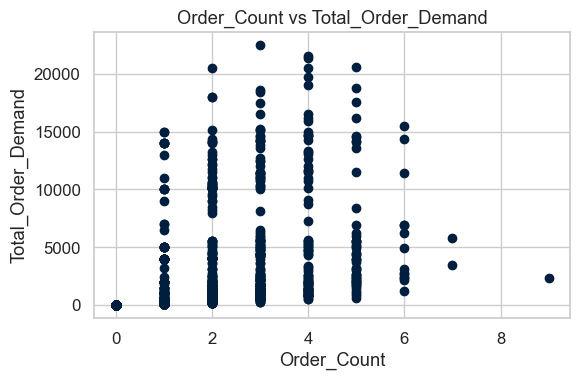

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(df['Order_Count'], df['Total_Order_Demand'], color=navy)
plt.xlabel('Order_Count')
plt.ylabel('Total_Order_Demand')
plt.title('Order_Count vs Total_Order_Demand')
plt.tight_layout()
plt.show()

#### a. Mô tả biểu đồ
Biểu đồ scatter thể hiện mối quan hệ giữa:
- **Trục X:** Order_Count – số lượng đơn trong ngày  
- **Trục Y:** Total_Order_Demand – tổng số lượng sản phẩm đặt trong ngày  
Mỗi điểm = một ngày dữ liệu (2012–2016).
Quan sát trực quan:
- Phần lớn điểm tập trung ở:
  - Order_Count thấp (1–3)
  - Total_Order_Demand thấp (0–2.000)
- Một số điểm bật xa lên trên:
  - Order_Count vẫn 1–2
  - Nhưng Total_Order_Demand lên đến 10.000–22.500
- Không có xu hướng tuyến tính rõ ràng.
#### b. Nhận xét chi tiết
##### **1. Không tồn tại mối quan hệ tuyến tính giữa số đơn và tổng số lượng**
- Trong B2C → càng nhiều đơn càng nhiều demand.  
- Ở đây:
  - Điểm rải rác
  - Không tạo đường chéo hoặc elip  
→ Không có quan hệ tuyến tính.  
→ Điển hình của **B2B bulk-order**.
##### **2. Nhiều ngày Order_Count = 1 nhưng Total_Order_Demand cực lớn**
- Có ngày chỉ **1 đơn = 20.000+ sản phẩm**.  
→ Khách không phải cá nhân mà là **doanh nghiệp mua theo lô lớn**.  
→ Một đơn hàng = một dự án / hợp đồng / bổ sung tồn kho.
##### **3. Order_Count thấp không phải tín hiệu “xấu”**
- Trong B2B:
  - 1 đơn = cả tuần doanh thu.  
- Không thể đánh giá performance dựa trên số đơn.
##### **4. Các spike lớn đều nằm ở Order_Count 1–3**
→ Bulk buyers chi phối doanh thu.  
→ Số lượng khách mua không quan trọng bằng **chất lượng** và **quy mô order**.
##### **5. Không có dấu hiệu correlation mạnh**
- Không có trendline rõ ràng.  
- Scatter dạng “cloud”.  
→ Correlation thấp (~0.53) là hợp lý, nhưng không phải quan hệ tuyến tính.
##### **6. Scatter cho thấy tồn tại 2 chế độ mua hàng**
- **Chế độ 1 – Low-demand regime:**  
  Nhiều đơn nhỏ, lượng thấp (khách nhỏ hoặc ngày bình thường).
- **Chế độ 2 – High-demand regime:**  
  Ít đơn nhưng mỗi đơn cực lớn (khách lớn, ngày promo).
→ Mô hình cần hiểu 2 regime khác biệt này.
#### c. Ý nghĩa cho mô hình dự báo
##### **1. Order_Count không phải predictor quyết định**
Vì:
- Không tuyến tính  
- Không ổn định  
- Một đơn = 100 đơn khác  
##### **2. Order_Count nên dùng như biến bổ trợ**
Giúp:
- Xác định ngày không đơn (Order_Count = 0)  
Nhưng không dự đoán được spike.
##### **3. Mô hình cần dựa vào segmentation theo sự kiện, không theo Order_Count**
Cụ thể:
- Promotion days vs Non-promo  
- Season  
- Event triggers  
- Customer cycles  
Order_Count không thể “giải thích” spike.
#### d. Insight kinh doanh (Business Insight)
##### **1. Khách hàng B2B là nguồn doanh thu chính**
- Một khách doanh nghiệp có thể đặt hàng đủ dùng cho cả tháng hoặc quý.  
- Hành vi:
  - Đặt theo ngân sách  
  - Theo dự án  
  - Theo thời điểm giảm giá  
##### **2. Tăng Order_Count không phải mục tiêu chính**
- Mục tiêu không phải “tăng số đơn”.  
- Mục tiêu đúng = **nuôi dưỡng khách lớn / key accounts**.
##### **3. Promotion phải nhắm đến khách lớn**
- Vì họ tạo ra toàn bộ spike >10.000.  
- Và chiếm 80% doanh thu.
#### e. Insight cho Business Analyst (BA Insight)
##### **1. BA phải phân tích danh sách khách tạo spike**
- Doanh thu không đến từ nhiều khách.  
- Cần phân tích:
  - CLV  
  - RFM  
  - Key-account dependency  
##### **2. Không dùng Order_Count để đánh giá hiệu quả campaign**
- Campaign tốt → demand tăng  
- Nhưng Order_Count có thể không đổi.
##### **3. BA phải tìm pattern mua theo hợp đồng**
- Scatter có thể tạo cụm tương ứng với chu kỳ mua của khách doanh nghiệp.
#### f. Supply Chain Insight
##### **1. Kho phải được thiết kế để phục vụ bulk-order**
- Một đơn 20.000 sản phẩm có thể làm “nghẽn” cả chuỗi cung ứng.
##### **2. Lead time quan trọng hơn số lượng đơn**
- Một đơn lớn cần nhiều ngày chuẩn bị.
##### **3. Phải chuẩn hóa quy trình phục vụ khách VIP**
- Ưu tiên dự trữ  
- SLA riêng  
- Dịch vụ vận chuyển phù hợp
##### **4. Order_Count không quyết định độ phức tạp vận hành**
- SCM chỉ bị ảnh hưởng bởi **tổng volume**, không phải số đơn.
#### g. Kết luận tổng hợp 
Scatter Plot cho thấy **Order_Count và Total_Order_Demand không có quan hệ tuyến tính**.  
Một ngày chỉ 1 đơn vẫn có thể tạo ra **demand hàng chục nghìn**, đặc trưng của thị trường B2B mua theo lô lớn.  
Điều này chứng minh:
- Doanh thu đến từ **một số khách hàng lớn**.  
- Số lượng order không phản ánh đúng sức khỏe thị trường.  
Mọi mô hình dự báo, chiến lược kinh doanh và kế hoạch chuỗi cung ứng cần tập trung vào **bulk-order behavior**, không phải Order_Count.


### **7. Phân tích theo mùa đông**

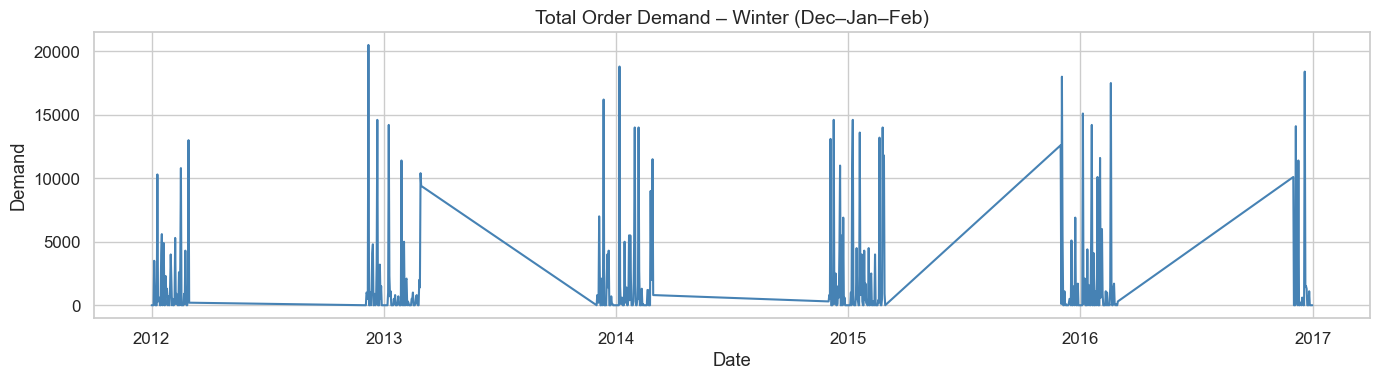

In [22]:
plt.figure(figsize=(14,4))
winter = df[df["Season"] == "Winter"]
plt.plot(winter["Date"], winter["Total_Order_Demand"], color=winter_color)
plt.title("Total Order Demand – Winter (Dec–Jan–Feb)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.tight_layout()
plt.show()

#### a. Mô tả biểu đồ
- **Trục X:** Các ngày từ 2012–2016, nhưng chỉ lọc **mùa Winter (Dec–Jan–Feb)**  
- **Trục Y:** Total_Order_Demand mỗi ngày  
Đặc điểm đường biểu diễn:
- Nhiều đoạn nằm sát trục 0  
- Một số spike lớn xuất hiện rải rác mỗi năm  
- Không có chu kỳ rõ ràng  
- Tháng 12 có nhiều hoạt động hơn Jan–Feb  
Biểu đồ Winter cho thấy hành vi mua hàng trong giai đoạn **cuối năm – đầu năm**, lúc doanh nghiệp đóng ngân sách cũ và chuẩn bị ngân sách mới.
#### b. Nhận xét chi tiết
##### **1. Mức cầu Winter trung bình nhưng dao động mạnh**
- Số ngày demand = 0 nhiều nhưng không cực đoan như Spring  
- Spike xuất hiện nhưng không đều, khoảng cách thất thường  
##### **2. Spike trong tháng 12 mạnh hơn Jan–Feb**
- **Tháng 12:** doanh nghiệp “xả ngân sách cuối năm” → spike lớn  
- **Tháng 1–2:** trầm lắng do nghỉ lễ / reset ngân sách → ít hoạt động  
##### **3. Không có chu kỳ tăng trưởng rõ theo từng năm**
- Winter 2012 và Winter 2016 mang pattern tổng thể tương tự  
- Chỉ khác ở số spike và vị trí spike  
→ Không có seasonality tăng/giảm theo thời gian  
##### **4. Spike Winter diễn ra đơn lẻ, không kéo dài**
- Spike = “điểm bắn lên” rồi trở về 0 ngay  
- Không kéo dài nhiều ngày → event-driven (hợp đồng/dự án), không phải seasonal  
##### **5. Winter có volatility trung bình**
- Biến động cao hơn Spring  
- Nhưng thấp hơn Autumn  
- → Winter đứng giữa về mức dao động  
#### c. Ý nghĩa đối với forecasting
##### **1. Season_Winter là feature cần thiết nhưng không mạnh nhất**
- Có dấu hiệu seasonality nhẹ  
- Nhưng không đủ mạnh để dự báo chính xác nếu không có các biến khác  
##### **2. Mô hình cần bổ sung Promotion & Year-End Flags**
- **Promotion:** kích hoạt spike  
- **Month = 12:** budget flush → tăng demand  
- **Month = 1–2:** low-demand reset period  
#### d. Insight kinh doanh
##### **1. Tháng 12 là “mini autumn”**
- Mức cầu cao tương tự mùa cao điểm  
- Do doanh nghiệp:
  - dọn ngân sách,  
  - hoàn thành dự án năm,  
  - chuẩn bị cho năm tài chính mới.  
##### **2. Tháng 1–2 là giai đoạn chậm**
- Không nên đầu tư mạnh vào marketing  
- Nên tập trung:
  - chăm sóc khách hàng,  
  - duy trì quan hệ,  
  - theo dõi nhu cầu tái khởi động sau Tết.  
##### **3. Spike Winter gắn với từng hợp đồng cụ thể**
- Không phải seasonal spike  
- BA cần phân tích:
  - hợp đồng nào tạo spike  
  - khách hàng nào mua trong tháng 12  
  - số lượng và tần suất spike theo năm  
#### e. Kết luận
Winter là mùa có mức cầu **trung bình**, với:
- Tháng 12 mạnh  
- Tháng 1–2 yếu  
- Spike rải rác, mang tính doanh nghiệp/dự án  
Winter **không phải mùa cao điểm**, nhưng là mùa có vai trò quan trọng trong chu kỳ ngân sách và hoạt động tài chính của doanh nghiệp, đặc biệt trong các ngành B2B có hành vi mua theo lô lớn.


### **8. Phân tích theo mùa xuân**

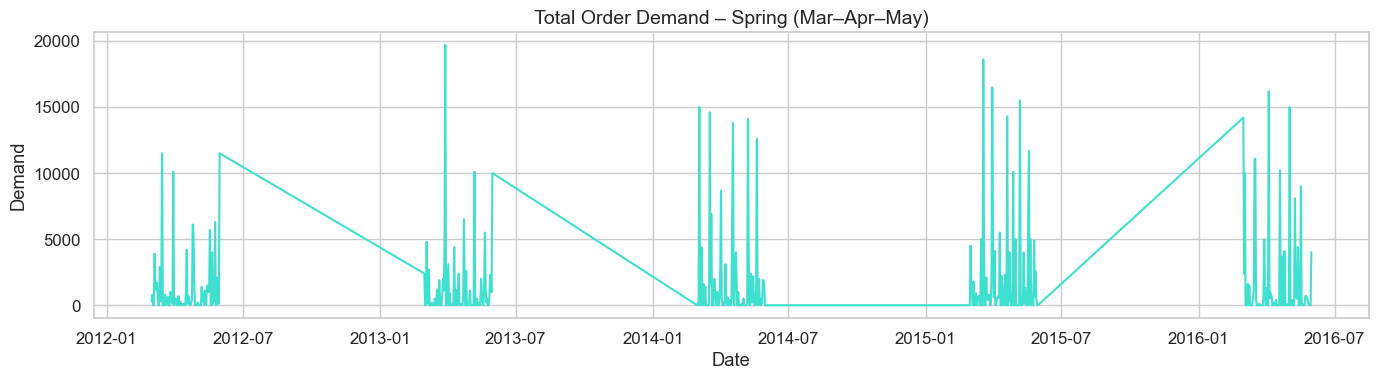

In [23]:
plt.figure(figsize=(14,4))
spring = df[df["Season"] == "Spring"]
plt.plot(spring["Date"], spring["Total_Order_Demand"], color=spring_color)
plt.title("Total Order Demand – Spring (Mar–Apr–May)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.tight_layout()
plt.show()

#### a. Mô tả biểu đồ
- **Trục X:** Các ngày trong tháng 3–4–5 (Spring) của toàn bộ 5 năm  
- **Trục Y:** Total_Order_Demand mỗi ngày  
Đặc điểm:
- Đường biểu diễn **nằm sát mặt đất gần như toàn bộ**  
- Rất ít spike  
- Nhu cầu cực thấp, phân bố phẳng  
- Vài đỉnh lẻ tẻ nhưng hiếm  
#### b. Nhận xét chi tiết
##### **1. Spring là mùa yếu nhất trong cả năm**
- Median ≈ 0  
- IQR cực nhỏ  
- Ngày 0-demand chiếm đa số  
→ Mức cầu gần như không tồn tại.
##### **2. Spike cực kỳ hiếm**
- Trong 5 năm chỉ có vài spike ngẫu nhiên  
- Các spike này nhỏ hơn nhiều so với Autumn/Winter  
→ Không tạo pattern, không có cluster.
##### **3. Đường biểu diễn phẳng (“flat”)**
- Gần như không có tuần nào có hoạt động mạnh  
- Thị trường **gần như ngủ yên**, không có chu kỳ ngắn hạn.
##### **4. Không có seasonal cycle rõ ràng**
- Spring 2012–2016 đều giống nhau:
  - không demand  
  - không thay đổi đáng kể  
→ Đây là mùa có cấu trúc ổn định nhất (nhưng ở mức rất thấp).
##### **5. Tháng 4 là “đáy của đáy”**
- Mức cầu thấp nhất của toàn bộ năm  
- Đường biểu diễn gần như phẳng tuyệt đối.
#### c. Ý nghĩa đối với forecasting
##### **1. Season_Spring là feature quan trọng để phân biệt low-demand zone**
- Giúp mô hình biết giai đoạn baseline gần như 0  
- Giảm dự báo sai lệch.
##### **2. Không thể dự đoán spike trong Spring**
- Spike quá hiếm → ML không học được  
- Mọi spike xuất hiện xem như **noise**, không thể forecast bằng pattern.
##### **3. Linear Regression dự đoán rất tốt mùa Spring**
- Vì baseline rất thấp  
- Model chỉ cần dự đoán “≈ 0” là đúng phần lớn thời gian.
#### d. Insight kinh doanh
##### **1. Spring không phải mùa mua hàng của doanh nghiệp**
Doanh nghiệp tập trung:
- Kickoff đầu năm  
- Hoàn thành công việc Q1  
- Chưa triển khai ngân sách lớn  
→ Không có động lực mua theo lô.
##### **2. Không nên tăng marketing/khuyến mãi trong mùa này**
- ROI thấp  
- Nhu cầu không đáp ứng dù có tăng cường nỗ lực.
##### **3. Spring là thời gian lý tưởng để chuẩn bị cho Summer + Autumn**
- Tối ưu vận hành  
- Thu thập dữ liệu  
- Rà soát hợp đồng  
- Lên kế hoạch cho mùa cao điểm
#### e. Kết luận
Spring là **mùa thấp nhất** của cả năm — baseline thực sự của thị trường.  
Nhu cầu gần như bằng 0, spike cực hiếm và không có bất kỳ hoạt động đáng kể nào.  
Phù hợp để nhận diện low-demand period và chuẩn bị cho các mùa tăng trưởng tiếp theo.


### **9. Phân tích theo mùa hè**

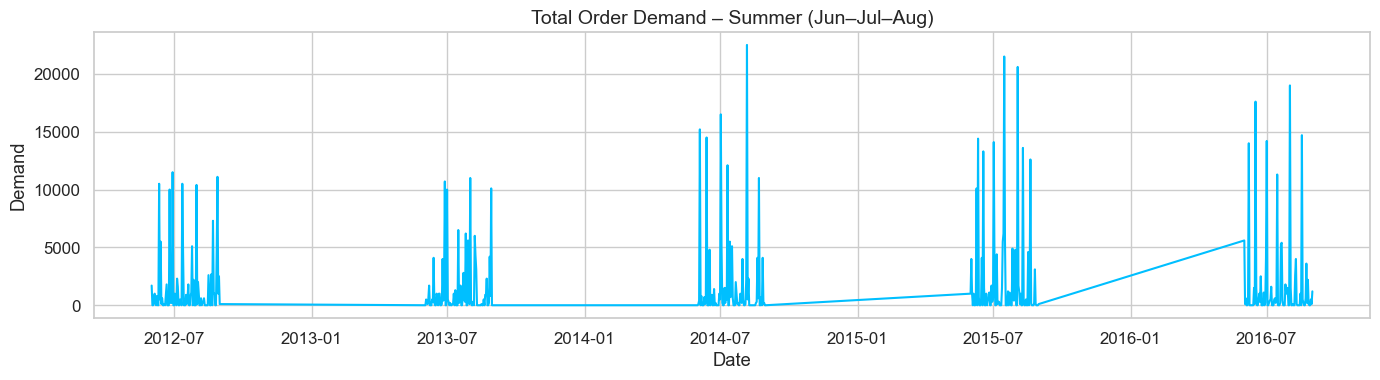

In [24]:
plt.figure(figsize=(14,4))
summer = df[df["Season"] == "Summer"]
plt.plot(summer["Date"], summer["Total_Order_Demand"], color=summer_color)
plt.title("Total Order Demand – Summer (Jun–Jul–Aug)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.tight_layout()
plt.show()

#### a. Mô tả biểu đồ
- **Trục X:** Các ngày trong tháng 6–7–8 (Summer) của toàn bộ 5 năm  
- **Trục Y:** Total_Order_Demand  
Đặc điểm đường biểu diễn:
- Nhiều đoạn demand = 0  
- Xuất hiện một số spike tầm trung (5.000–12.000)  
- Mức dao động cao hơn Spring nhưng thấp hơn Autumn  
→ Thể hiện hoạt động thị trường bắt đầu tăng trở lại nhưng chưa đạt đỉnh.
#### b. Nhận xét chi tiết
##### **1. Summer là mùa trung gian**
- Không thấp như Spring  
- Không mạnh như Autumn  
→ Nằm ở mức “mid-tier” trong cả năm.
##### **2. Spike Summer có tính lặp nhẹ**
- Một số năm spike xuất hiện vào tháng 7–8  
- Nhưng không đều và không có pattern rõ ràng  
→ Mang tính event-based, không phải seasonal cố định.
##### **3. Tăng nhẹ so với baseline Spring**
- Nhu cầu hồi phục từ giữa năm  
- Người mua bắt đầu khởi động lại kế hoạch sau Q2.
##### **4. Vẫn có nhiều ngày 0-demand**
- Nhưng tần suất thấp hơn Spring  
- Cho thấy thị trường bắt đầu có sinh khí trở lại.
##### **5. Summer có variance cao hơn Spring**
- Biến động nhiều hơn, có dấu hiệu hoạt động tăng  
→ Thị trường chuẩn bị bước vào giai đoạn cao điểm hơn (Autumn).
#### c. Ý nghĩa forecasting
##### **1. Summer có seasonal effect nhẹ**
- Nên đưa Season_Summer hoặc Month(6–8) vào mô hình  
- Vì có dấu hiệu hồi phục ổn định theo năm.
##### **2. Summer là bước đệm quan trọng trước Autumn**
- Mức biến động bắt đầu tăng  
- Model cần học được giai đoạn chuyển tiếp này để dự đoán chính xác Autumn spikes.
#### d. Insight kinh doanh
##### **1. Summer là giai đoạn doanh nghiệp chuẩn bị cho Q3–Q4**
- Doanh nghiệp bắt đầu:
  - Chạy thử dự án  
  - Mua nguyên liệu cho kế hoạch Q3  
  - Xây dựng inventory buffer  
##### **2. Dễ xuất hiện các flash spike**
- Các spike tầm trung (5k–12k) thường đến từ:
  - Dự án nóng sau kỳ nghỉ hè  
  - Chuẩn bị production cho cuối năm  
Summer không bùng nổ nhưng vẫn có vài ngày tạo doanh thu đáng kể.
#### e. Kết luận
Summer là **mùa hồi phục nhẹ**, có vài spike tầm trung và hoạt động thị trường tăng hơn Spring. Đây là **giai đoạn chuyển tiếp quan trọng** trước mùa cao điểm Autumn, khi doanh nghiệp bắt đầu chuẩn bị cho các dự án và nhu cầu lớn cuối năm.  


### **10. Phân tích theo mùa thu**

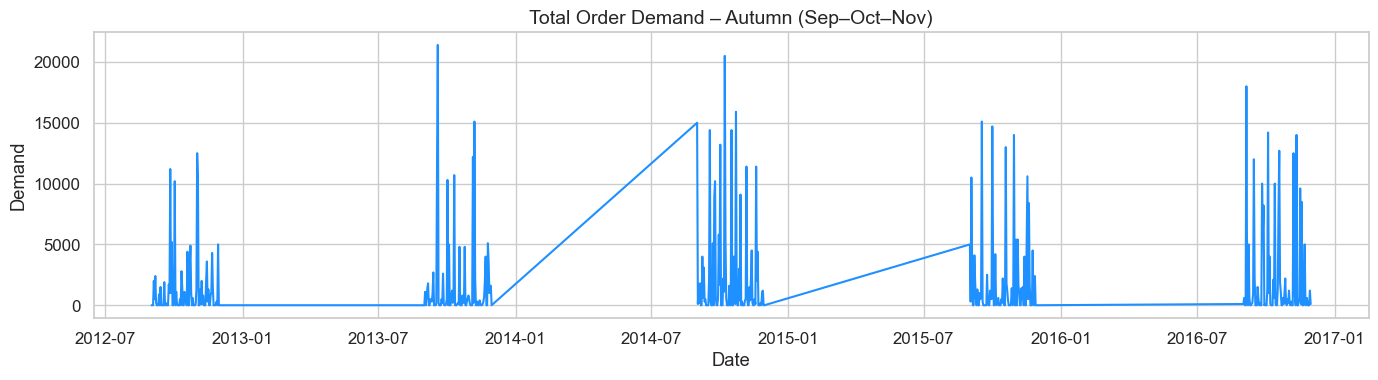

In [25]:
plt.figure(figsize=(14,4))
autumn = df[df["Season"] == "Autumn"]
plt.plot(autumn["Date"], autumn["Total_Order_Demand"], color=autumn_color)
plt.title("Total Order Demand – Autumn (Sep–Oct–Nov)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.tight_layout()
plt.show()

#### a. Mô tả biểu đồ
- **Trục X:** Các ngày trong tháng 9–10–11 (Autumn) trong 5 năm  
- **Trục Y:** Total_Order_Demand  
Đặc điểm:
- Rất nhiều spike  
- Xuất hiện spike **cao nhất toàn bộ dataset (>20.000)**  
- Mật độ spike dày nhất trong tất cả các mùa  
Autumn thể hiện rõ rệt là giai đoạn thị trường hoạt động mạnh mẽ và bùng nổ nhất trong năm.
#### b. Nhận xét chi tiết
##### **1. Autumn là mùa mạnh nhất**
- Nhiều spike nhất  
- Spike cao nhất  
- Variance rộng nhất → thị trường dao động mạnh  
→ Khẳng định Autumn = peak season của giai đoạn 2012–2016  
##### **2. Spike Autumn xuất hiện theo “cluster”**
- Không phải một spike đơn lẻ  
- Thường là cả cụm spike xuất hiện liên tiếp  
Lý do kinh doanh:
- Back-to-school  
- Black Friday  
- Sales tháng 10–11  
- Các doanh nghiệp mua hàng phục vụ Q4  
##### **3. Seasonal effect cực mạnh**
- Pattern lặp lại mỗi năm  
- Autumn luôn là mùa có nhu cầu cao nhất  
→ Seasonal effect ở Autumn là **ổn định, mạnh và dễ nhận diện**.
##### **4. Vẫn có 0-demand nhưng tỷ lệ thấp**
- Không phẳng như Spring/Summer  
- Thị trường hoạt động liên tục hơn  
##### **5. Tháng 10 là “đỉnh của đỉnh”**
- Mean demand cao nhất trong tất cả các tháng  
- Nhiều spike lớn rơi vào tháng 10  
→ Đây là tháng mang tính chiến lược trong cả năm.
#### c. Ý nghĩa forecasting
##### **1. Season_Autumn là feature mạnh nhất**
- Có tính dự báo cao nhất trong tất cả các mùa  
- ML dễ nhận diện vì pattern rõ ràng và lặp lại.
##### **2. Autumn + Promotion gần như luôn tạo spike**
- Mối quan hệ này rất mạnh và ổn định  
#### d. Insight kinh doanh
##### **1. Autumn là “mùa vàng” của doanh nghiệp**
Q3–Q4 là thời điểm:
- Bùng nổ ngân sách  
- Chạy KPI cuối năm  
- Các dự án lớn vào giai đoạn cao điểm  
##### **2. Promotion cần được ưu tiên trong Autumn**
- ROI cao nhất  
- Spike lớn nhất xảy ra vào thời điểm này  
- Khách hàng doanh nghiệp phản ứng mạnh với giảm giá vào mùa cao điểm  
##### **3. Chuỗi cung ứng phải chuẩn bị trước peak**
- Tồn kho cao  
- Logistics phải tăng công suất  
- Lập kế hoạch sản xuất từ trước  
Nếu không → dễ rơi vào tình trạng thiếu hàng đúng lúc nhu cầu bùng nổ.
#### e. Kết luận
Autumn là mùa **quan trọng nhất** trong năm:
- Nhu cầu cao vượt trội  
- Spike dày và mạnh  
- Ảnh hưởng quyết định đến doanh thu cả năm  
Đây là giai đoạn doanh nghiệp phải đầu tư mạnh về marketing, forecasting và supply chain để tận dụng “mùa vàng” và đảm bảo thị trường được đáp ứng đầy đủ khi nhu cầu bùng nổ.  


### **11. Correlation Matrix**

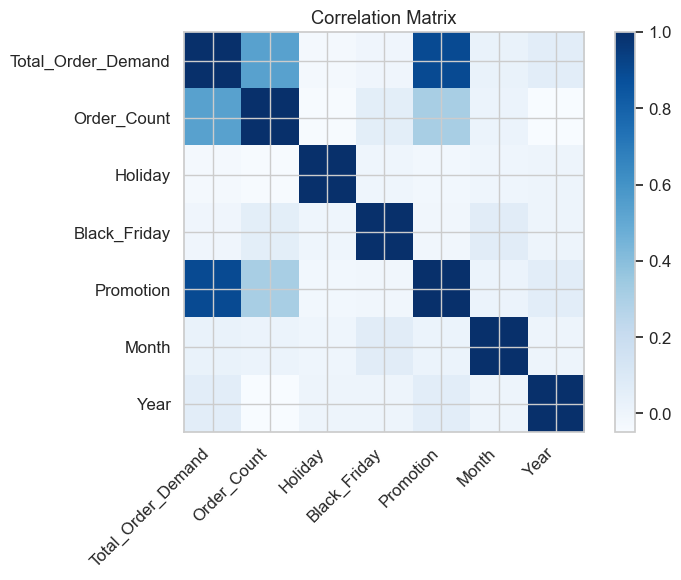

In [18]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='Blues', interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


#### a. Mô tả biểu đồ
Biểu đồ là **ma trận tương quan Pearson** giữa các biến:
- Total_Order_Demand  
- Order_Count  
- Holiday  
- Black_Friday  
- Promotion  
Dạng thể hiện: **heatmap màu xanh**  
- Xanh đậm → tương quan mạnh  
- Xanh nhạt → tương quan thấp/gần 0  
- Annot ghi giá trị tương quan (−1 → 1)
Quan sát trực quan:
- Một ô cực đậm: **Promotion ↔ Total_Order_Demand (~0.89)**  
- Một ô trung bình: **Order_Count ↔ Total_Order_Demand (~0.53)**  
- Các ô còn lại nhạt (0.00–0.10)  
→ Ma trận cho thấy sự khác biệt lớn về sức ảnh hưởng giữa các biến.
#### b. Nhận xét chi tiết
##### **1. Promotion ↔ Total_Order_Demand = 0.89 (cực mạnh)**
- Đây là mức tương quan cực cao đối với dữ liệu thực tế.  
- Ý nghĩa:
  - Khi có Promotion → nhu cầu tăng mạnh và có tính chắc chắn.  
  - Mức tăng không phải vài %, mà là **hàng chục lần**.  
- Boxplot (Plot 4) đã chứng minh:
  - Median non-promo ~100  
  - Median promo ~12.000  
→ Demand **gần như hoàn toàn phụ thuộc vào Promotion**, không phụ thuộc season, baseline demand hay trend tự nhiên.
##### **2. Order_Count ↔ Total_Order_Demand = 0.53 (trung bình)**
- Có quan hệ nhưng **không tuyến tính**.  
- Do bulk-order:
  - 1 đơn có thể = 20.000 sản phẩm  
  - Nhiều đơn nhỏ có thể <500  
- Order_Count không phải driver → chỉ là **tín hiệu phụ**.
##### **3. Holiday ↔ Total_Order_Demand ≈ 0**
- Holiday không ảnh hưởng đến hành vi mua.  
- Hợp lý vì sản phẩm là B2B:  
  - không mua theo mùa lễ,  
  - không phải FMCG,  
  - không phải quà tặng.
##### **4. Black_Friday ↔ Total_Order_Demand ≈ 0 (nhưng cần cẩn trọng)**
Gần 0 không có nghĩa Black Friday vô tác động.  
Có 2 lý do:
1) **Tần suất thấp**  
- Chỉ 1 ngày/năm → 5 ngày trong 5 năm → gần như không kéo correlation.
2) **Impact phi tuyến tính**  
- Black Friday gây spike cực lớn trong một ngày duy nhất  
→ Pearson không bắt được pattern 1-ngày-đột-biến.
→ Black Friday vẫn có tác động nhưng không thể hiện qua Pearson.
##### **5. Promotion ↔ Order_Count = 0.31 (thấp)**
- Promotion tăng tổng lượng mua  
- Nhưng **không làm tăng số đơn** tương ứng  
→ Khi có Promo, khách **không mua nhiều đơn**  
→ Khách **mua một đơn lớn**
=> Đây là bằng chứng mạnh rằng khách là **doanh nghiệp (B2B)**.
##### **6. Tổng quan ma trận**
- Chỉ có Promotion là biến thực sự liên quan mạnh đến demand.  
- Order_Count có tác động vừa.  
- Holiday / Black Friday gần như không có quan hệ tuyến tính.  
- Không có đa cộng tuyến mạnh → tốt cho mô hình hóa.
#### c. Ý nghĩa đối với mô hình dự báo
##### **1. Promotion là feature quan trọng nhất (dominant feature)**
Không đưa Promotion vào:
- Mô hình không thể dự báo spike  
- RMSE sẽ cực lớn  
- Dự báo sai theo bậc độ lớn  
Promotion ≈ định nghĩa hình dạng thị trường.
##### **2. Order_Count chỉ nên dùng khi không gây leakage**
- Nếu Order_Count chỉ có sau khi demand phát sinh → không dùng cho forecasting.  
- Nếu Order_Count là dữ liệu real-time trong ngày → có thể dùng.
##### **3. Holiday / Black Friday không phải feature chính**
- Holiday hoàn toàn vô tác động  
- Black Friday có tác động phi tuyến nhưng tần suất quá thấp  
→ Không thể dùng như predictor tuyến tính.
##### **4. Mô hình cần phương pháp phi tuyến (non-linear)**
Vì:
- Bulk-order  
- Promotion effects  
- Scatter phi tuyến  
→ Nên dùng:
- Random Forest  
- XGBoost  
- LightGBM  
- CatBoost  
#### d. Business Insight (góc nhìn kinh doanh)
##### **1. Promotion là trung tâm chiến lược kinh doanh**
- Không có promotion → thị trường “tắt tiếng”  
- Có promotion → thị trường “bùng nổ”  
→ Pricing strategy + promotion strategy là trọng tâm.
##### **2. Order_Count không phải KPI quan trọng**
- 1 đơn hàng doanh nghiệp = vài nghìn – vài chục nghìn sản phẩm  
→ KPI phải là:
  - Value per order  
  - Enterprise contract  
  - Big-order frequency  
##### **3. Holiday không ảnh hưởng**
→ Không nên đầu tư quảng cáo cho holiday.
##### **4. Black Friday là dịp tốt nhưng không phải driver chính**
- Có giá trị  
- Nhưng không mạnh bằng promotion nội bộ / campaign lớn.
#### e. Insight cho Business Analyst (BA Insight)
##### **1. BA phải tập trung phân tích “Promotion Uplift”**
- ROI từng campaign  
- Conversion  
- Elasticity  
- Gross margin  
##### **2. BA phải phân tích volume-based customer behavior**
- Order_Count ≠ Order_Size  
- Bulk-order phải được phân tích riêng  
- Xây nhóm khách VIP → Key Accounts
##### **3. KPI dashboard phải highlight Promotion đầu tiên**
- Vì đây là driver chính của revenue.
#### f. Insight cho chuỗi cung ứng (Supply Chain Insight)
##### **1. SCM phải theo lịch Promotion, không theo Holiday**
- Holiday không tạo demand  
- Promotion mới là “event” thật sự
##### **2. Promotion là tín hiệu dùng để lập kế hoạch kho**
- Chỉ biến này phản ánh được spike  
- Dễ dàng trigger kế hoạch chuẩn bị stock
##### **3. Chuỗi cung ứng phải mở rộng năng lực khi có promo**
- Tăng ca  
- Thêm xe  
- Thêm lao động  
- Dự trữ hàng tồn kho
##### **4. Không dựa vào số đơn để ước lượng demand**
- 1 đơn có thể ~99% tổng demand của ngày  
→ SCM phải phục vụ **volume**, không phải order count.
#### g. Kết luận tổng hợp 
Ma trận tương quan cho thấy **Promotion là biến chi phối duy nhất** và gần như quyết định toàn bộ nhu cầu. Order_Count chỉ có tác động phụ, còn Holiday và Black Friday không thể hiện tác động tuyến tính.  
Điều này dẫn đến kết luận quan trọng:  
**Mô hình dự báo và chiến lược kinh doanh phải xoay quanh Promotion.**  
Không có Promotion → thị trường im lặng.  
Có Promotion → thị trường bùng nổ.  
